## Day 35 Lecture 2 Assignment

In this assignment, we will learn combine what we have learned so far about classification algorithms this week.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from time import time




In [0]:
admission_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Admission_Predict.csv')

In [65]:
admission = admission_df.copy()
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In this assignment, we will predict the probability of a student being admitted to a PhD program given their stats. To make the predictions, find the median for the Chance of Admit column. Create an admit column where all probabilities above the median will receive a 1 for that column and all probabilities below the median will be a zero.

Below you will process and clean the data, try the SVM classifier, the gradient boosted decision tree classifier and XGBoost, and compare your results.

Have fun!

In [0]:
# Answer below:

In [66]:
list(admission.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [67]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [68]:
admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [69]:
admission.median()

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [70]:
print(admission['Chance of Admit '].median())

0.73


In [0]:
admission['admit'] = np.where(admission['Chance of Admit '] > admission['Chance of Admit '].median(), 1,0)

In [72]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [0]:
admission = admission.drop(['Serial No.'], axis=1)

In [74]:
 admission['University Rating'].unique() 

array([4, 3, 2, 5, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7899c8b70>,
      dtype=object)

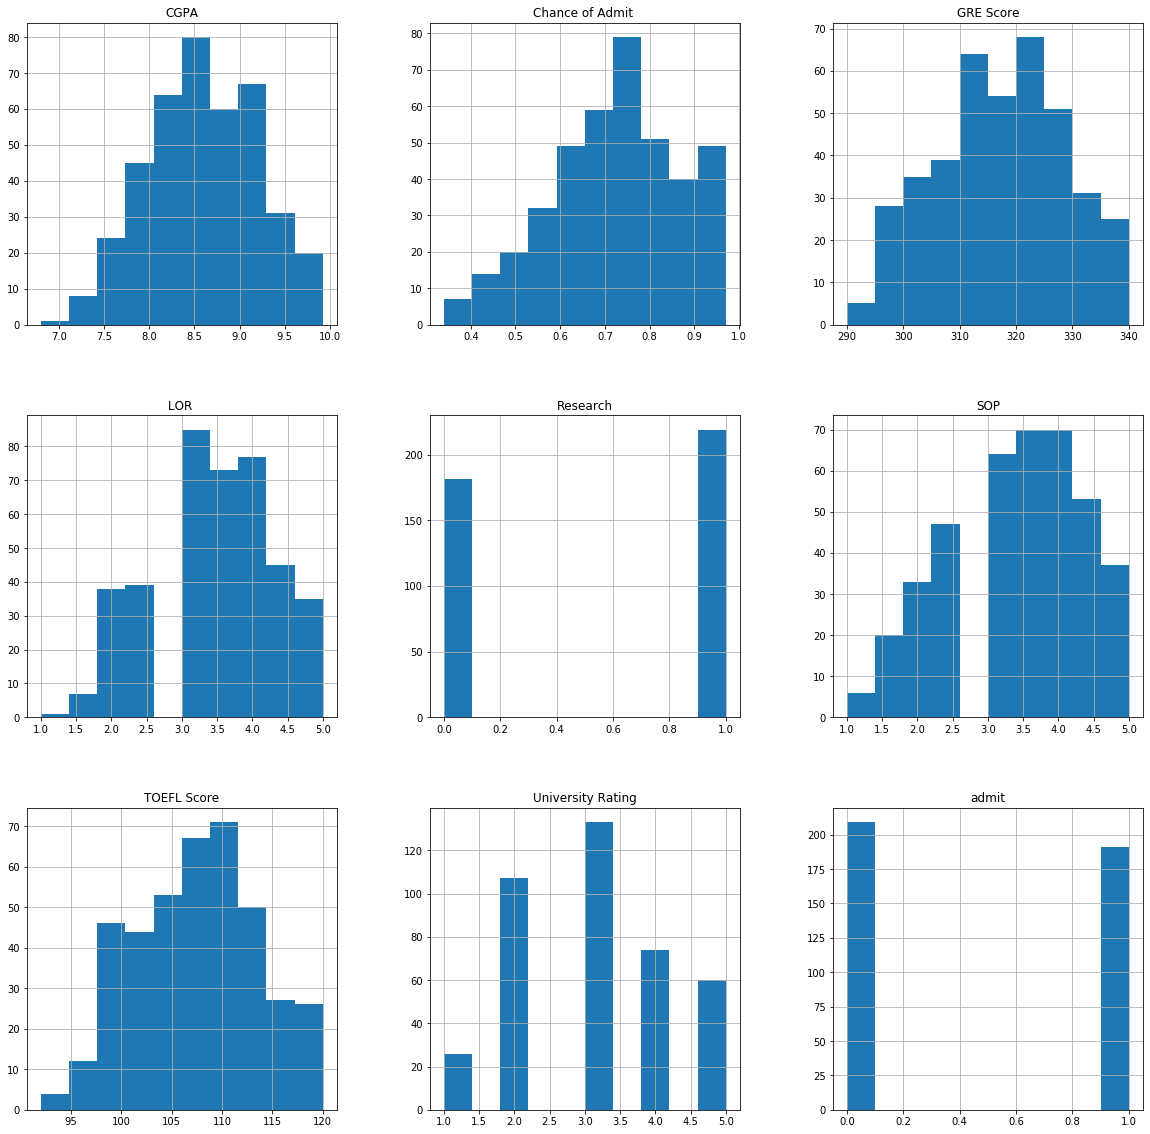

In [75]:
admission.hist(figsize=(20,20))

In [0]:
'''
admission['University Rating'] = admission['University Rating'].astype('object')

admission = pd.concat([admission,pd.get_dummies(admission['University Rating'], prefix="ur", drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(admission['University Rating'], prefix="ur", drop_first=True).columns)
'''


In [76]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [0]:
from sklearn.model_selection import train_test_split
X = admission.drop(['Chance of Admit ', 'admit'], axis=1)

y = admission['admit']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

In [78]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [79]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='linear')
svm.fit(X_train, y_train)

print('Accuracy on training set', svm.score(X_train, y_train))
print('Accuracy on testing set', svm.score(X_test, y_test))


Accuracy on training set 0.890625
Accuracy on testing set 0.875


In [80]:
from sklearn.model_selection import GridSearchCV

svm= SVC(kernel='linear')

tuned_parameters = [{'C': [.000001 ,.00001, .0001, .001, .01, .1, .5, 1, 5, 10, 100]}]

csvm = GridSearchCV(svm,  param_grid=tuned_parameters, cv=10)
csvm.fit(X_train, y_train)

print(csvm.best_params_)

{'C': 5}


In [81]:
svm = SVC(C=5)
svm.fit(X_train, y_train)

print('Accuracy on training set', svm.score(X_train, y_train))
print('Accuracy on testing set', svm.score(X_test, y_test))


Accuracy on training set 0.865625
Accuracy on testing set 0.775


In [82]:
svm= SVC(C=5)

tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf']}]

csvm = GridSearchCV(svm,  param_grid=tuned_parameters, cv=10)
csvm.fit(X_train, y_train)

print(csvm.best_params_)

{'kernel': 'linear'}


In [83]:
svm = SVC(C=5, kernel='linear')
svm.fit(X_train, y_train)

print('Accuracy on training set', svm.score(X_train, y_train))
print('Accuracy on testing set', svm.score(X_test, y_test))


Accuracy on training set 0.890625
Accuracy on testing set 0.8625




---



---



---


Do Gradient Boosted Decision Tree Classifier


---

---



---





---



In [84]:
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

%timeit gb.fit(X_train, y_train)

print('Train score:', gb.score(X_train, y_train))
print('Test score:', gb.score(X_test, y_test))

10 loops, best of 3: 150 ms per loop
Train score: 1.0
Test score: 0.8375


---



---



---


Do XGB Boost


---

---



---





---


In [87]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

%timeit xgb.fit(X_train, y_train)
print('Train score:', xgb.score(X_train, y_train))
print('Test score:', xgb.score(X_test, y_test))

10 loops, best of 3: 35 ms per loop
Train score: 0.9875
Test score: 0.85
